In [60]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cars.csv')
print("Dataset info:", df.info())



# Check the number of null (NaN) values in a specific column
# null_count = df['country'].isna().sum()
# print(f"Number of null values in 'column_name': {null_count}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB
Dataset info: None


In [61]:
import pandas as pd
import numpy as np
import re

# Function to extract currency and amount from the price string
def extract_currency_and_price(price):
    if isinstance(price, str):
        parts = price.strip().split()
        

        if len(parts) == 2 and len(parts[0]) == 3:
            currency = parts[0]
            try:
                amount = float(parts[1].replace(',', ''))
                return currency, amount
            except ValueError:
                return None, None
        else:
            return None, None
    else:
        return None, None
    


# Data Cleaning: Standardize the 'seats' column
def standardize_seats(seat_value):
    # Check if the seat_value matches the "_ Seater" format
    if isinstance(seat_value, str) and re.match(r'^\d+ Seater$', seat_value):
        # Extract the number of seats
        return int(seat_value.split()[0])
    else:
        return np.nan


# Calculate the mean of 'num_seats', cast it to an integer & fill missing values
df['num_seats'] = df['seats'].apply(lambda x: pd.Series(standardize_seats(x))).astype('Int64')
mean_seats = int(df['num_seats'].mean())
df['num_seats'] = df['num_seats'].fillna(mean_seats)

# Convert 'top_speed' to numeric, setting non-numeric values to mean value
df['top_speed'] = pd.to_numeric(df['top_speed'], errors='coerce')
mean_top_speed = int(df['top_speed'].mean())
df['top_speed'] = df['top_speed'].fillna(mean_top_speed).astype('Int64')

df[['Currency', 'Amount']] = df['price'].apply(lambda x: pd.Series(extract_currency_and_price(x)))
df.dropna(subset=['Amount'], inplace=True)

# Conversion rates to USD
conversion_rates = {
    'USD': 1.0,      # US Dollar
    'SAR': 0.27,     # Saudi Riyal
    'EGP': 0.032,    # Egyptian Pound
    'BHD': 2.65,     # Bahraini Dinar
    'QAR': 0.27,     # Qatari Riyal
    'OMR': 2.6,      # Omani Rial
    'KWD': 3.3,      # Kuwaiti Dinar
    'AED': 0.27,     # UAE Dirham
}



df['Price_USD'] = df.apply(lambda row: row['Amount'] * conversion_rates.get(row['Currency'], np.nan), axis=1)



df.drop(columns=['price', 'Currency', 'Amount', 'seats'], inplace=True)
df.to_csv('processed_cars_data.csv', index=False)
print("Data saved to 'processed_cars_data.csv'")


Data saved to 'processed_cars_data.csv'


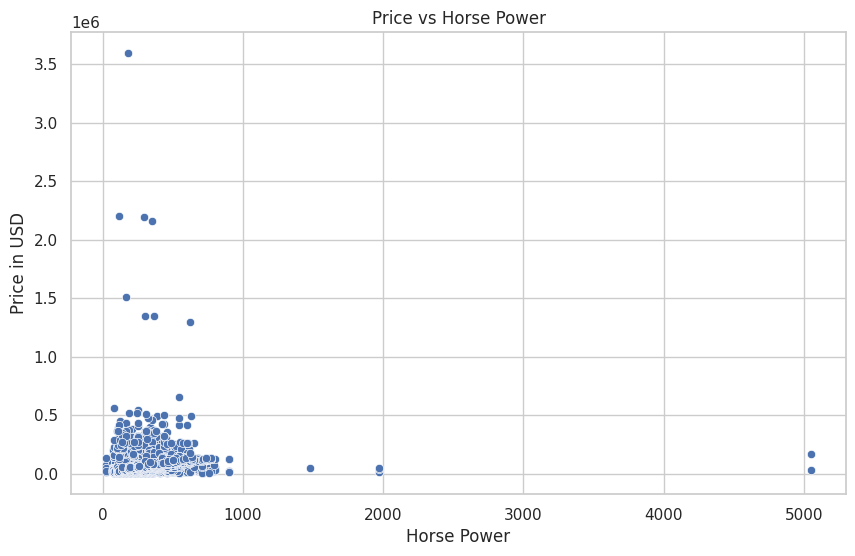

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleaning: Convert relevant columns to numeric
def clean_numeric(column):
    return pd.to_numeric(cars_data[column].replace(r'[^\d.]', '', regex=True), errors='coerce')

# Apply cleaning to relevant columns
df['horse_power'] = clean_numeric('horse_power')


# Set up the plotting style
sns.set(style="whitegrid")

# Create a single figure for the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='horse_power', y='Price_USD')
plt.title('Price vs Horse Power')
plt.xlabel('Horse Power')
plt.ylabel('Price in USD')
plt.show()


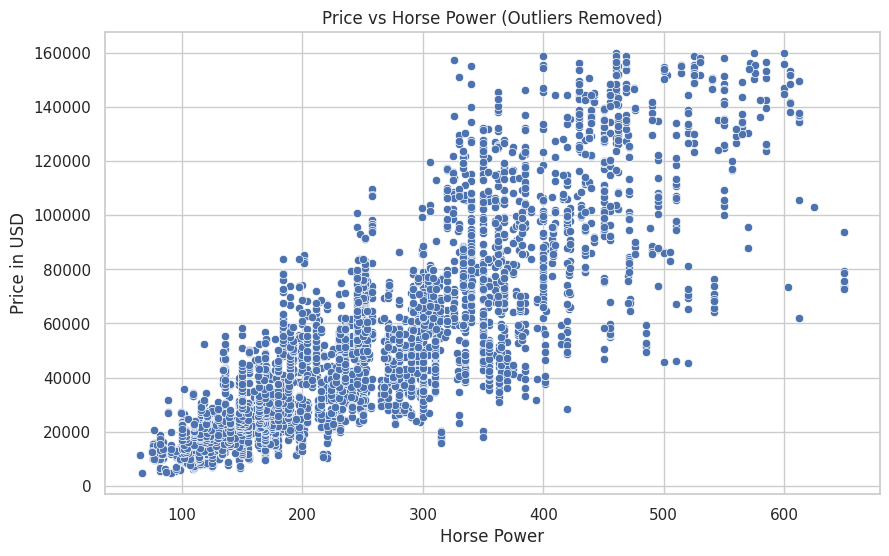

In [63]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to 'horse_power' and 'Price_USD'
cars_data_filtered = remove_outliers(cars_data, 'horse_power')
cars_data_filtered = remove_outliers(cars_data_filtered, 'Price_USD')

# Plotting the filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars_data_filtered, x='horse_power', y='Price_USD')
plt.title('Price vs Horse Power (Outliers Removed)')
plt.xlabel('Horse Power')
plt.ylabel('Price in USD')
plt.show()